### 导包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
import keras
import tensorflow as tf
print('keras:',keras.__version__,' tensorflow:',tf.__version__)

keras: 2.1.0  tensorflow: 1.2.1


### 加载数据集

In [2]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
# training X shape (60000, 28x28), Y shape (60000, ). test X shape (10000, 28x28), Y shape (10000, )

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


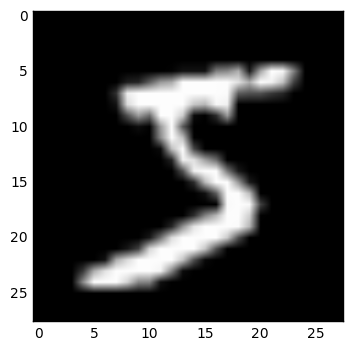

In [5]:
img = plt.imshow(X_train[0],cmap='gray')
plt.show()

### 数据预处理

In [3]:
# data pre-processing
#每张图片模式为28*28*1
X_train = X_train.reshape(-1,28,28,1)/255. #将输入数据集数据范围统一在0-1之间
X_test = X_test.reshape(-1,28,28,1)/255.
y_train = np_utils.to_categorical(y_train, num_classes=10) #将输出标签转换为“one-hot”形式
y_test = np_utils.to_categorical(y_test, num_classes=10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


### 构建模型

* Convolution2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

*  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

* MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)

* padding表示卷积的边界处理方式，有valid和same两种方式，valid方式不会在原有输入的基础上添加新的像素，same表示需要对input的边界数据进行填存(补0)

In [4]:
# Another way to build your CNN
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Conv2D( #二维卷积层
#     batch_input_shape=(64,1,28,28),
    input_shape=(28,28,1),
    filters=32, #滤波器数量（即输出的维度）
    kernel_size=5, #滤波器大小5*5
    strides=1, #步幅为1
    padding='same',     #补0策略，是否使用全0填充,same使用全0填充并不改变数据的长度和宽度
#     data_format='channels_first'
    #代表图像的通道维的位置
    #channels_first：(batch, channels, height, width))
    #channels_last：(batch, height, width, channels) 默认
))
model.add(Activation('relu'))
# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D( #二维最大池化层
    #池化的窗口大小一般与步幅设定为相同的值
    pool_size=2, #池化窗口大小2*2
    strides=2, #步幅为2，取2使得输出shape缩小一半
    padding='same',    # Padding method
#     data_format='channels_first'
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Conv2D(
        filters=64,
        kernel_size=5,
        strides=1, 
        padding='same', 
#         data_format='channels_first'
    ))
model.add(Activation('relu'))
# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(
        pool_size=2,
        strides=2,
        padding='same',
#         data_format='channels_first'
    ))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

### 编译模型

In [5]:
# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 训练模型

In [6]:
from keras.callbacks import TensorBoard
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=1, batch_size=64,callbacks=[TensorBoard(log_dir='./logs')])

Training ------------
Epoch 1/1
60000/60000 [==============================] - 296s 5ms/step - loss: 0.2873 - acc: 0.9208


### 评估模型

In [7]:
print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)
print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)


Testing ------------
10000/10000 [==============================] - 15s 2ms/step

test loss:  0.0911557792012

test accuracy:  0.9717


### 模型可视化

In [9]:
import keras
import os 
from keras.utils import plot_model
import matplotlib.pyplot as plt
print(os.pathsep) #路径分隔符
os.environ["PATH"] += os.pathsep + 'F:/Python/Keras/Keras-Visualize/bin' #关联到Graphviz可执行文件的系统变量
#模型可视化
plot_model(model,to_file='imgs/cnn_model.png')

;


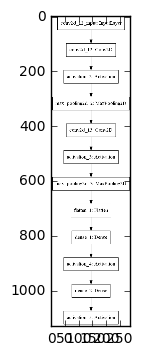

In [31]:
plt.imshow(plt.imread('imgs/cnn_model.png'))
plt.show()

### quiver
quiver是一个卷积特征可视化的交互式工具
<a>http://www.codedata.cn/cdetail/%E5%89%8D%E7%AB%AF/other/quiver</a>
<br>
<br>
 server.launch(
        model, # a Keras Model

        classes, # list of output classes from the model to present (if not specified 1000 ImageNet classes will be used)

        top, # number of top predictions to show in the gui (default 5)

        # where to store temporary files generatedby quiver (e.g. image files of layers)
        temp_folder='./tmp',

        # a folder where input images are stored
        input_folder='./',

        # the localhost port the dashboard is to be served on
        port=5000
    )

In [ ]:
from quiver_engine import server
server.launch(model, 
              classes=[0,1,2,3,4,5,6,7,8,9],
              #classes=['0','1','2','3','4','5','6','7','8','9'],
              temp_folder = './temp', #保存quiver产生的临时文件
              input_folder = './input_imgs') #保存输入的图片